# Basic simulation template

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
import numpy as np

# import the package and the web API
import tidy3d as td
import tidy3d.web as web


In [2]:
# set up parameters of simulation (length scales are micrometers)
grid_cells_per_wvl = 30
pml = td.PML()
sim_size = (4, 4, 4)
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 12.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), medium=dielectric
)

# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization="Ey",
)

# create monitor
monitor = td.FieldMonitor(
    fields=["Ex", "Ey", "Hz"],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields_on_plane",
)

# Initialize simulation
sim = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=grid_cells_per_wvl),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML()),
)


In [3]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells."
)


simulation grid is shaped [192, 192, 192] for 7 million cells.


In [4]:
# run the simulation, download the data.
data = web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=True)


[15:16:35] Created task 'quickstart' with task_id 'fdve-a1e8f676-419f-4ca8-a693-02ca5e02f1e6v1'.      ]8;id=538935;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=620105;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#139\139]8;;\

Output()

[15:16:38] status = queued                                                                            ]8;id=782385;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=589203;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#269\269]8;;\

Output()

[15:16:42] status = preprocess                                                                        ]8;id=451974;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=174327;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#263\263]8;;\

[15:16:49] Maximum FlexCredit cost: 0.028. Use 'web.real_cost(task_id)' to get the billed FlexCredit cost ]8;id=25401;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=410238;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#286\286]8;;\
           after a simulation run.                                                                                 

           starting up solver                                                                         ]8;id=598877;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=133390;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#290\290]8;;\

           running solver                                                                             ]8;id=604004;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=692597;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#300\300]8;;\

Output()

[15:17:13] early shutoff detected, exiting.                                                           ]8;id=111925;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=276939;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#313\313]8;;\

[15:17:14] status = postprocess                                                                       ]8;id=83341;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=782397;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#330\330]8;;\

Output()

[15:17:17] status = success                                                                           ]8;id=278058;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=277917;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#337\337]8;;\

Output()

[15:17:24] loading SimulationData from data/data.hdf5                                                 ]8;id=901969;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=393041;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#512\512]8;;\

In [5]:
# see the log
print(data.log)


Simulation domain Nx, Ny, Nz: [192, 192, 192]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.3014e+06.
Using subpixel averaging: True
Number of time steps: 1.2659e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 3.1624e-17


Compute source modes time (s):     0.0133
Compute monitor modes time (s):    0.0025
Rest of setup time (s):            6.7563

Running solver for 12659 time steps...
- Time step    506 / time 1.60e-14s (  4 % done), field decay: 1.00e+00
- Time step    839 / time 2.65e-14s (  6 % done), field decay: 1.00e+00
- Time step   1012 / time 3.20e-14s (  8 % done), field decay: 1.00e+00
- Time step   1519 / time 4.80e-14s ( 12 % done), field decay: 1.44e-01
- Time step   2025 / time 6.40e-14s ( 16 % done), field decay: 3.23e-02
- Time step   2531 / time 8.00e-14s ( 20 % done), field decay: 1.37e-02
- Time step   3038 / time 9.61e-14s ( 24 % done), field decay: 6.90e-03
- Time step   3544 / time 1.12e-13s ( 28 % done), field decay: 3.30e-03
- Time

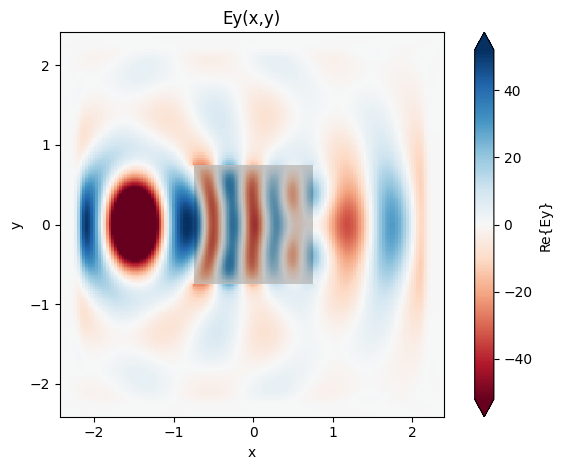

In [7]:
# plot the fields stored in the monitor
ax = data.plot_field("fields_on_plane", "Ey", z=0)
_ = ax.set_title("Ey(x,y)")
